<a href="https://colab.research.google.com/github/danthonyrodriguez/Colab-Notebooks/blob/main/Phy_Home_Multi_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import plotly.express as px
!pip install tabulate
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 40kB 2.3MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=f7ab19fb5c4a7d22da564eb9a6ad74e128e903b7d76931627d72c5f147bc41e3
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original = pd.read_csv('/content/drive/My Drive/DA 6833/merge_wc_edit_update_PCA.csv', na_values = ['9999',"9999", ' ', ''])
res = list(original.isnull().sum().items())
res

[('NO', 0),
 ('DataFileCountryofOrigin', 0),
 ('Q1', 0),
 ('Q2', 283),
 ('Q2_1', 0),
 ('Q2_2', 0),
 ('Q2_3', 0),
 ('Q2_4', 0),
 ('Q2_5', 0),
 ('Q2_6', 0),
 ('Q2_7', 643),
 ('Q3', 0),
 ('Q4_1', 0),
 ('Q4_2', 0),
 ('Q4_3', 0),
 ('Q4_4', 0),
 ('Q4_5', 0),
 ('Q4_6', 0),
 ('Q4_7', 0),
 ('Q4_8', 0),
 ('Q5', 813),
 ('Q6', 813),
 ('Q7', 813),
 ('Q8', 813),
 ('Q9', 813),
 ('Q10', 813),
 ('Q11', 813),
 ('Q12', 813),
 ('Q13', 813),
 ('Q14', 813),
 ('Q15', 838),
 ('Q16', 838),
 ('Q17_1', 838),
 ('Q17_2', 838),
 ('Q17_3', 838),
 ('Q17_4', 838),
 ('Q17_5', 838),
 ('Q17_6', 838),
 ('Q18', 838),
 ('Q19', 838),
 ('Q20', 838),
 ('Q21_1', 838),
 ('Q21_2', 838),
 ('Q21_3', 838),
 ('Q22', 838),
 ('Q23', 838),
 ('Q24', 838),
 ('Q25', 838),
 ('Q26_1', 0),
 ('Q26_2', 456),
 ('Q26_3', 456),
 ('Q26_4', 357),
 ('Q26_5', 0),
 ('Q27', 2),
 ('Q28', 2),
 ('Q29', 0),
 ('Q30_1', 0),
 ('Q30_2', 0),
 ('Q30_3', 3),
 ('Q30_4', 2),
 ('Q30_5', 1),
 ('Q30_6', 1),
 ('Q30_7', 1),
 ('Q30_8', 1),
 ('Q30_9', 2),
 ('Q30_10', 2),
 

In [ ]:
#Deleted columns with high NA counts based on above, saved to new csv

df = pd.read_csv('/content/drive/My Drive/DA 6833/merge_wc_edit_update_PCA2.csv', na_values = ['9999',"9999", ' ', ''])

# Print the shape of "Update2" CSV
print(df.shape)

df.describe()

(1099, 101)


,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q26_1,Q26_5,Q27,Q28,Q29,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q34_5,Q34_6,Q34_7,Q34_8,Q34_9,Q35_1,Q35_2,Q35_3,...,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q39,Q41,Q42,Age,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,Q31_Max,Q32_Max,Q33_Max,Q34_Max,ENI_Factors,BGE_Factors,OGA_Factors,TECH_Factors,PIR_Factors
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1097.000000,1097.000000,1099.000000,1099.000000,1099.000000,1096.000000,1097.000000,1098.000000,1098.000000,1098.000000,1098.000000,1097.000000,1097.000000,1099.000000,1097.000000,1099.000000,1099.000000,1099.000000,1099.000000,1098.000000,1099.000000,...,1097.000000,1094.000000,1096.000000,1098.000000,1096.000000,1097.000000,1098.000000,1099.000000,1098.000000,1098.000000,1097.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1086.000000,1099.000000,1099.000000,1099.000000,1096.000000,1097.000000,1099.000000,1099.000000,1099.000000,1099.000000,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03
mean,1.935396,2.367607,0.683348,0.427662,0.673339,0.226570,0.058235,0.193813,3.341219,4.290264,4.330300,3.478617,3.363967,3.510464,2.535032,2.699727,2.347589,2.669700,4.072793,3.480401,3.249772,2.602366,1.946315,2.672429,1.299270,1.247949,1.150273,1.072860,1.074681,1.073770,1.078396,1.080219,0.341219,0.667274,0.356688,0.291174,0.163785,2.744313,2.436248,1.484076,...,3.157703,2.787934,2.382299,2.214936,2.285584,2.030082,2.946266,2.343949,2.194900,2.196721,2.177758,2.303913,2.194722,1.728844,2.084622,3.101001,3.209281,3.396724,3.177434,3.238399,2.469518,3.180164,3.567789,1.697907,1.110100,1.723757,0.324841,0.414923,0.260237,6.729927,0.545123,2.949045,2.890810,3.086442,2.657871,-2.857142e-10,1.546874e-11,9.554133e-11,2.218426e-16,-3.002684e-11
std,0.762517,0.586340,0.465382,0.494965,0.469205,0.418802,0.234293,0.395464,0.919849,0.904555,0.840191,1.239986,1.176738,1.127011,1.247001,1.320605,1.325531,1.644415,1.475414,1.397282,1.421794,2.190648,1.288817,1.579143,0.709903,0.686522,0.565012,0.420716,0.379363,0.434418,0.395294,0.444903,1.261394,1.887230,1.540048,1.498884,1.203561,0.912947,0.983008,0.696381,...,0.844539,0.886413,0.886642,1.236513,0.875654,0.841449,1.128010,1.100582,0.966292,0.981835,1.351647,1.050845,0.971511,0.801408,0.933650,0.800608,0.800652,0.727440,0.803227,0.776206,0.974973,0.864356,1.318807,0.786791,0.354104,1.131504,0.468529,0.492933,0.438963,2.177103,0.498187,1.859634,2.309184,1.783549,2.052889,1.569372e+00,1.510698e+00,1.761044e+00,2.402997e+00,1.857773e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.037903e+00,-2.384420e+00,-4.078790e+00,-5.054668e+00,-3.306052e+00
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000

In [ ]:
### Step 1: Constructing Train and Test Sets for Logistic Regression
### I am going to grab only the relevant variables from our initial data set - The "Update_PCA" CSV. 

Data = df
#[['NO','DataFileCountryofOrigin','Q14','Q5','Q23', 'Q24','Q25', 'Q27', 'Q28','Q39', 'Q40', 'Q41', 'Q42', 
#            'Q31_Max', 'Q32_Max','Q33_Max', 'Q34_Max', 'Male','ENI_Factors', 'BGE_Factors','OGA_Factors', 'TECH_Factors', 
#            'PIR_Factors', 'Q26_1', 'Q26_4', 'Q36_16', 'Q36_18']]

Data = Data.set_index("NO")

print(Data.shape)

Data.head()

(1099, 100)


,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q26_1,Q26_5,Q27,Q28,Q29,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q34_5,Q34_6,Q34_7,Q34_8,Q34_9,Q35_1,Q35_2,Q35_3,...,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q39,Q41,Q42,Age,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,Q31_Max,Q32_Max,Q33_Max,Q34_Max,ENI_Factors,BGE_Factors,OGA_Factors,TECH_Factors,PIR_Factors
NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sg1,2,3,1,1,0,0,0,0,3,4,4,4,3,2,2,2,1,3,6,3.0,2.0,3,1,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,2,2.0,2,...,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3,3.0,3.0,3.0,0,3,3,2,2,2,3,3,3,3,2,1,5,1,1.0,0,1,0,5.0,NaN,1,2,2,2,0.410557,1.365297,0.066123,1.690926,1.320077
en38,2,2,1,0,0,0,0,0,3,5,5,5,5,4,4,3,3,2,4,5.0,2.0,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,4,1.0,1,...,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4,4.0,4.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,7.0,NaN,2,2,2,2,-1.612441,8.128382,2.822864,-2.622617,-0.511065
re25,2,2,1,0,1,0,0,0,2,3,4,2,2,2,2,2,3,5,4,2.0,4.0,2,2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,3,3.0,2,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3,3,2,3,3,3,3,3,3,2,3,3,1,1,1.0,0,1,0,6.0,0.0,5,2,2,2,0.815450,0.673172,-1.527111,2.153578,0.296094
re47,2,3,0,0,1,0,0,0,3,4,4,4,2,3,3,3,4,4,4,1.0,4.0,2,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,4,2.0,4,...,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3,3.0,3.0,3.0,1,3,2,2,4,4,4,4,3,4,3,3,1,1,1.0,0,1,0,5.0,0.0,3,2,3,2,0.469872,-1.689587,-0.095561,-0.398677,-1.908558
re44,2,2,1,0,0,0,0,0,2,5,4,1,2,3,2,2,1,6,3,1.0,5.0,4,1,2,3.0,4.0,5.0,1.0,4.0,3.0,2.0,1.0,0,0.0,0,0,0,1,2.0,1,...,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4,3.0,2.0,1.0,2,3,2,4,1,2,4,3,1,1,2,5,2,2,1.0,0,1,0,6.0,0.0,2,0,8,0,2.409520,2.858529,-1.960660,2.564042,-1.101400


In [ ]:
### Renaming columns for ease of interpretation later

Data = Data.rename(columns={"Q31_Max": "phy_for_intensity", "Q32_Max": "cyb_for_intensity",
                            "Q33_Max":"phy_hom_intensity","Q34_Max":"cyb_hom_intensity"})
#"DataFileCountryofOrigin": "Country", "Q14":"Facebook",
#                           "Q5":"AccessInternetAccounts","Q23":"TrustNewsFBPerson", 
#                            "Q24": "TrustNewsFBGral", "Q25": "TrustMost",
#                           "Q27": "HrsCompWorkSchool", "Q28":"HrsCompNotWorkSchool",
#                           "Q39": "Educ_Level", "Q40":"University", "Q41":"Employment",
#                           "Q42":"MaritalStatus","Q26_1": "ChatroomHRS","Q26_4": "InformationSearches","Q36_16": "SportCompWin","Q36_18": "UseForce"})


Data.shape ### I have 1099 rows with 22 columns
Data.columns


Index(['DataFileCountryofOrigin', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5',
       'Q2_6', 'Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7',
       'Q4_8', 'Q26_1', 'Q26_5', 'Q27', 'Q28', 'Q29', 'Q30_1', 'Q30_2',
       'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6', 'Q30_7', 'Q30_8', 'Q30_9', 'Q30_10',
       'Q34_5', 'Q34_6', 'Q34_7', 'Q34_8', 'Q34_9', 'Q35_1', 'Q35_2', 'Q35_3',
       'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8', 'Q35_9', 'Q35_11',
       'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q36_1', 'Q36_2', 'Q36_3',
       'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10',
       'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15', 'Q36_16', 'Q36_17',
       'Q36_18', 'Q36_19', 'Q36_20', 'Q36_21', 'Q37_1', 'Q37_2', 'Q37_3',
       'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q39',
       'Q41', 'Q42', 'Age', 'US_dummy', 'Taiwan_dummy', 'SouthAfrica_dummy',
       'Total_Hour', 'Male', 'phy_for_intensity', 'cyb_for_intensity',
       'phy_hom_int

In [ ]:
### More data clean up: I am dropping a couple rows because their 'Male' value is blank.

Data = Data.drop(['sg1', 'en38'])
Data = Data.round(2)
Data = Data.fillna(0)
Data.shape

(1097, 100)

In [ ]:
### This function categorizes the 4 attack intensity variables into low, medium or high. From Hiwot Girma's code.

def createCyberIntensity(row, col_name):
  if(row[col_name]<=1):
    return 0
  if(row[col_name] >1 and row[col_name]<=4):
    return 1
  else:
    return 2

In [ ]:
### Now we are applying the low/medium/high funciton to the 4 attack intensity variables (originally, the 'max value' variables)

Data['cyb_hom_intensity'] = Data.apply (lambda row: createCyberIntensity(row, 'cyb_hom_intensity'), axis=1)
Data['cyb_for_intensity'] = Data.apply (lambda row: createCyberIntensity(row, 'cyb_for_intensity'), axis=1)
Data['phy_for_intensity'] = Data.apply (lambda row: createCyberIntensity(row, 'phy_for_intensity'), axis=1)
Data['phy_hom_intensity'] = Data.apply (lambda row: createCyberIntensity(row, 'phy_hom_intensity'), axis=1)

In [ ]:
### Now I'm going to take a look at the distributions of the 4 categorized attack intensity variables.


PhyHomeIntense = px.histogram(Data, x='phy_hom_intensity', title="Distribution of Physical Home Intensity") 
PhyHomeIntense.show()




In [ ]:
### Here I am determining Predictive and Target Variables
x = Data.drop(['phy_hom_intensity'], axis=1)

In [ ]:
x.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q26_1,Q26_5,Q27,Q28,Q29,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q34_5,Q34_6,Q34_7,Q34_8,Q34_9,Q35_1,Q35_2,Q35_3,...,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q39,Q41,Q42,Age,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,phy_for_intensity,cyb_for_intensity,cyb_hom_intensity,ENI_Factors,BGE_Factors,OGA_Factors,TECH_Factors,PIR_Factors
NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
re25,2,2,1,0,1,0,0,0,2,3,4,2,2,2,2,2,3,5,4,2.0,4.0,2,2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,3,3.0,2,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3,3,2,3,3,3,3,3,3,2,3,3,1,1,1.0,0,1,0,6.0,0.0,2,1,1,0.82,0.67,-1.53,2.15,0.30
re47,2,3,0,0,1,0,0,0,3,4,4,4,2,3,3,3,4,4,4,1.0,4.0,2,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,4,2.0,4,...,4.0,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3,3.0,3.0,3.0,1,3,2,2,4,4,4,4,3,4,3,3,1,1,1.0,0,1,0,5.0,0.0,1,1,1,0.47,-1.69,-0.10,-0.40,-1.91
re44,2,2,1,0,0,0,0,0,2,5,4,1,2,3,2,2,1,6,3,1.0,5.0,4,1,2,3.0,4.0,5.0,1.0,4.0,3.0,2.0,1.0,0,0.0,0,0,0,1,2.0,1,...,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4,3.0,2.0,1.0,2,3,2,4,1,2,4,3,1,1,2,5,2,2,1.0,0,1,0,6.0,0.0,1,0,0,2.41,2.86,-1.96,2.56,-1.10
re14,2,2,0,1,0,0,0,0,3,3,4,3,5,2,2,2,1,4,5,3.0,2.0,2,1,2,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,2,2.0,2,...,1.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,3,2.0,2.0,1.0,2,1,2,1,2,2,2,1,2,2,1,3,1,1,1.0,0,1,0,5.0,0.0,1,0,0,0.41,3.67,0.76,1.55,-1.10
ps6,2,3,1,0,1,0,0,0,2,4,4,4,4,3,2,2,2,3,2,2.0,2.0,2,4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0,0,0,3,2.0,2,...,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,3,2.0,2.0,2.0,2,2,2,2,2,4,3,4,3,2,3,3,1,1,1.0,0,1,0,4.0,0.0,1,1,1,-1.61,0.17,-0.14,0.55,-0.14


In [ ]:
# scale target variables for multinomial logistic regression (Low, Medium, High)
y_3_scale = Data['phy_hom_intensity']

### 3. Physical Home Target (71% Accuracy)

### Multinomial Logistic Regression



**Multinomial Logistic Regression - y_3_scale = Physical Home Intensity**

Accuracy of logistic regression classifier on test set: 0.65
[[42 14  1]
 [19 67 14]
 [ 4 26 33]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        57
           1       0.63      0.67      0.65       100
           2       0.69      0.52      0.59        63

    accuracy                           0.65       220
   macro avg       0.65      0.64      0.64       220
weighted avg       0.65      0.65      0.64       220



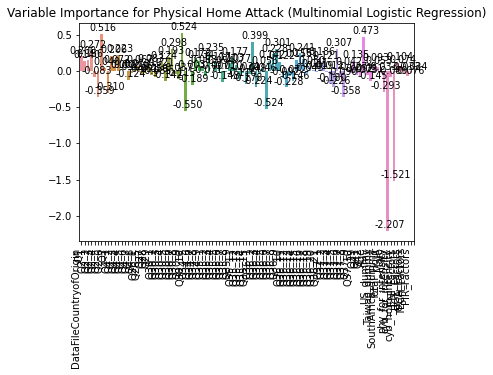

In [ ]:
#Model with all columns to find importance
x_3_scaletrain, x_3_scaletest, y_3_scaletrain, y_3_scaletest = train_test_split(x, y_3_scale, test_size=.2, random_state=0)

### define the multinomial logistic regression model
multi3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi3.fit(x_3_scaletrain,y_3_scaletrain)
predictions = multi3.predict(x_3_scaletest)

### Print Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(multi3.score(x_3_scaletest, y_3_scaletest)))

### Print Confusion Matrix
print(confusion_matrix(y_3_scaletest, predictions))

### Print Classification Report
print(classification_report(y_3_scaletest,predictions))

# Variable Importance for Cyber Home Attack
importance3 = multi3.coef_[0]
a = [z for z in range(len(importance3))]
ax = sns.barplot(x = a, y = importance3, data = x)
ax.set(title = 'Variable Importance for Physical Home Attack (Multinomial Logistic Regression)')
plt.xticks(range(100), x, rotation = 90, ha = 'right')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', xytext = (2, 3), textcoords = 'offset points', size = 9.5)


,0,1,2
DataFileCountryofOrigin,0.200476,-0.093355,-0.107121
Q1,0.140297,0.022576,-0.162873
Q2_1,0.155976,-0.088496,-0.067480
Q2_2,0.271641,-0.153649,-0.117992
Q2_3,-0.083010,-0.178099,0.261109
...,...,...,...
ENI_Factors,0.104439,0.095519,-0.199958
BGE_Factors,0.073603,0.044842,-0.118445
OGA_Factors,-0.033381,0.057665,-0.024285
TECH_Factors,-0.076227,0.099508,-0.023281


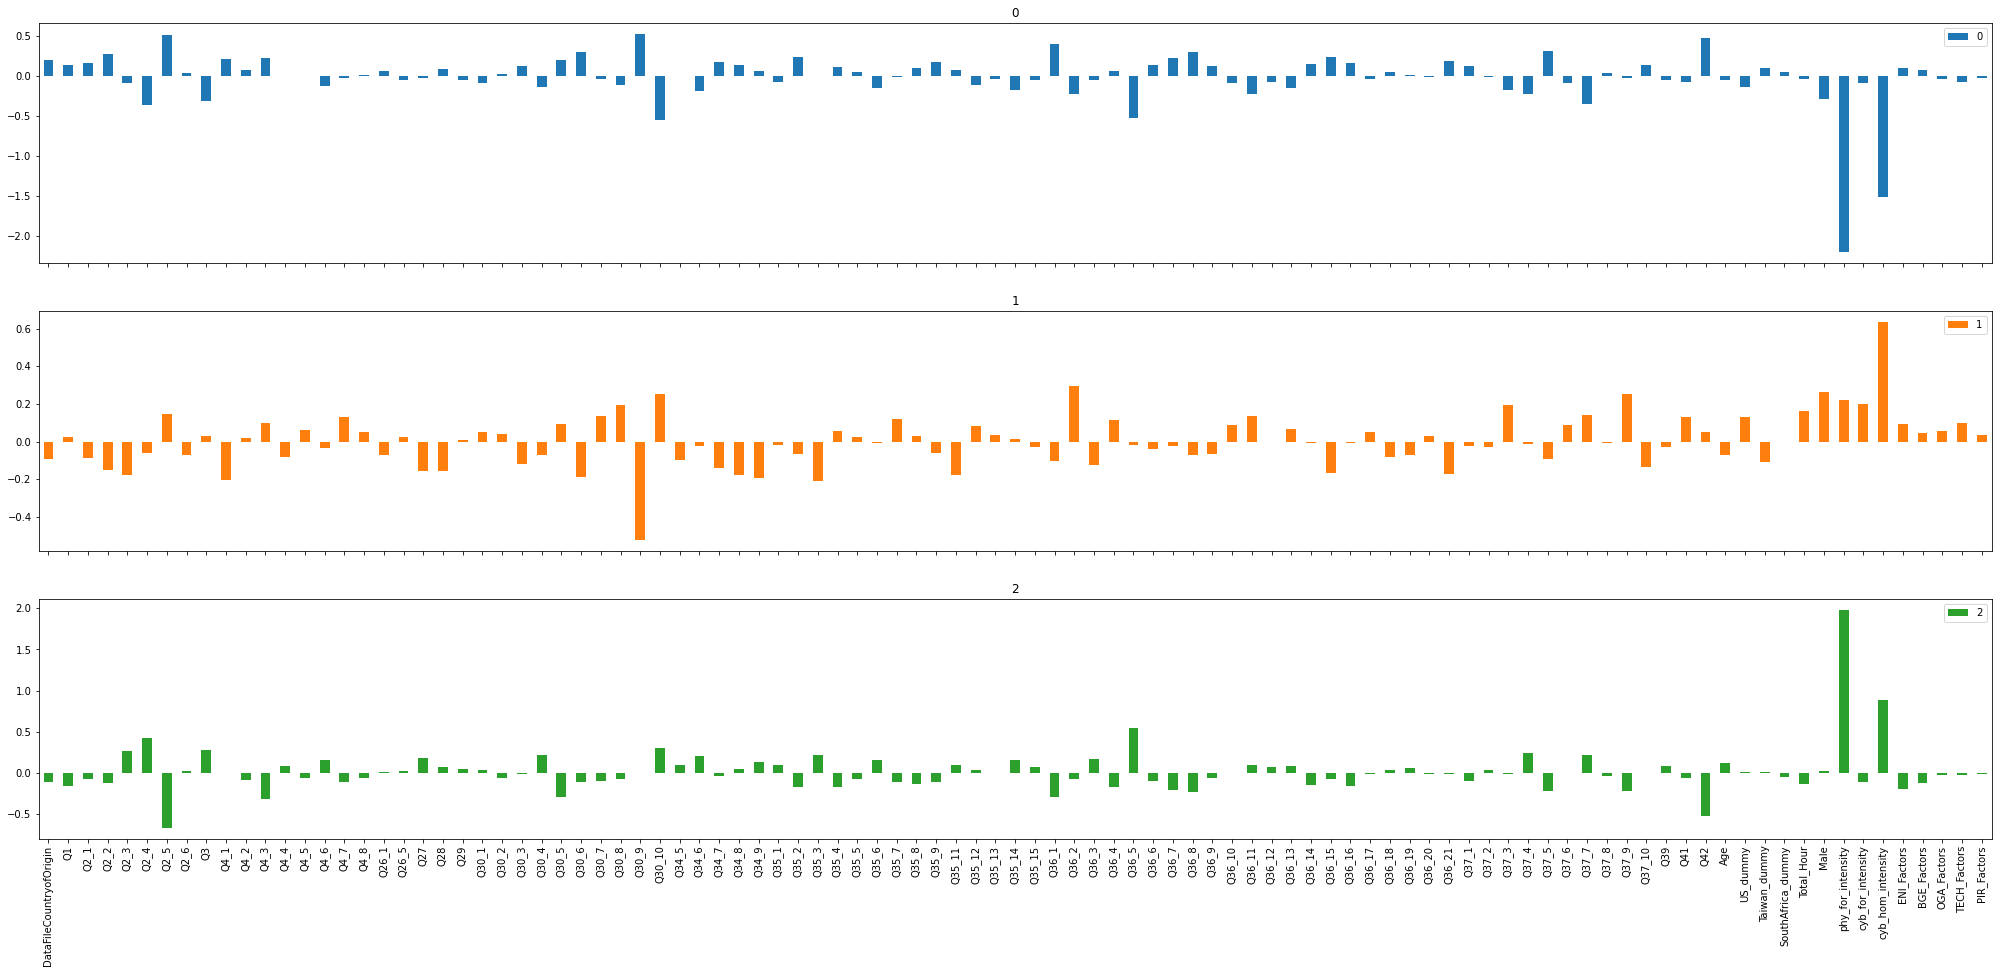

In [ ]:
### Bar graph of the coefficients for the model "multi4"

y3_coef=multi3.coef_

y3_var_coef = pd.DataFrame(y3_coef, columns = x.columns)

### Transpose coefficient dataframe for easy visualization

coef = y3_var_coef.T

coef.plot.bar(rot=90, subplots=True, figsize=(35,15))

### For easy table of the coefficients:

coef

Accuracy of logistic regression classifier on test set: 0.75
[[46  9  2]
 [10 80 10]
 [ 1 24 38]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        57
           1       0.71      0.80      0.75       100
           2       0.76      0.60      0.67        63

    accuracy                           0.75       220
   macro avg       0.76      0.74      0.74       220
weighted avg       0.75      0.75      0.74       220



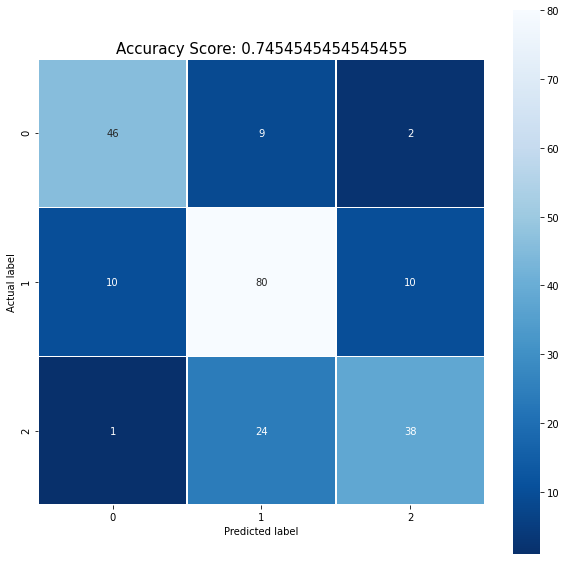

In [ ]:
###First selection of variables based on importance plot, accuracy = 72%
#imp_vars = ['Q2_5', 'Q30_9', 'Q30_10', 'Q36_1','Q36_2','Q36_5', 'Q42', 'phy_for_intensity', 'cyb_hom_intensity']
###Second selection of variables, accuracy = 75%
imp_vars = ['Q2_5', 'Q30_9', 'Q30_10','Q36_5', 'Q42', 'phy_for_intensity', 'cyb_hom_intensity']
###Third selection, accuracy = 71%
#imp_vars = ['Q2_5', 'Q30_9', 'Q30_10','Q36_5','Q36_7','Q36_8', 'Q42', 'phy_for_intensity', 'cyb_hom_intensity']
###Fourth selection, accuracy =74%
#imp_vars = ['Q2_5', 'Q30_9', 'Q30_10','Q36_5','Q37_7', 'Q42', 'phy_for_intensity', 'cyb_hom_intensity']
###Fifth selection, accuracy =%
#imp_vars = ['Q2_5', 'Q30_10','Q36_5', 'phy_for_intensity', 'cyb_hom_intensity']

x=Data[imp_vars]
x_3_scaletrain, x_3_scaletest, y_3_scaletrain, y_3_scaletest = train_test_split(x, y_3_scale, test_size=.2, random_state=0)

### define the multinomial logistic regression model
multi3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi3.fit(x_3_scaletrain,y_3_scaletrain)
predictions = multi3.predict(x_3_scaletest)

### Print Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(multi3.score(x_3_scaletest, y_3_scaletest)))

### Print Confusion Matrix
print(confusion_matrix(y_3_scaletest, predictions))

### Print Classification Report
print(classification_report(y_3_scaletest,predictions))

cm = metrics.confusion_matrix(y_3_scaletest, predictions)
score = multi3.score(x_3_scaletest, y_3_scaletest)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


,0,1,2
Q2_5,0.200025,-0.155350,-0.044675
Q30_9,0.357599,-0.301464,-0.056135
Q30_10,-0.181378,0.128569,0.052809
Q36_5,-0.176954,0.040451,0.136503
Q42,-0.182764,0.142788,0.039976
phy_for_intensity,-1.941668,0.266442,1.675226
cyb_hom_intensity,-1.334528,0.233647,1.100881


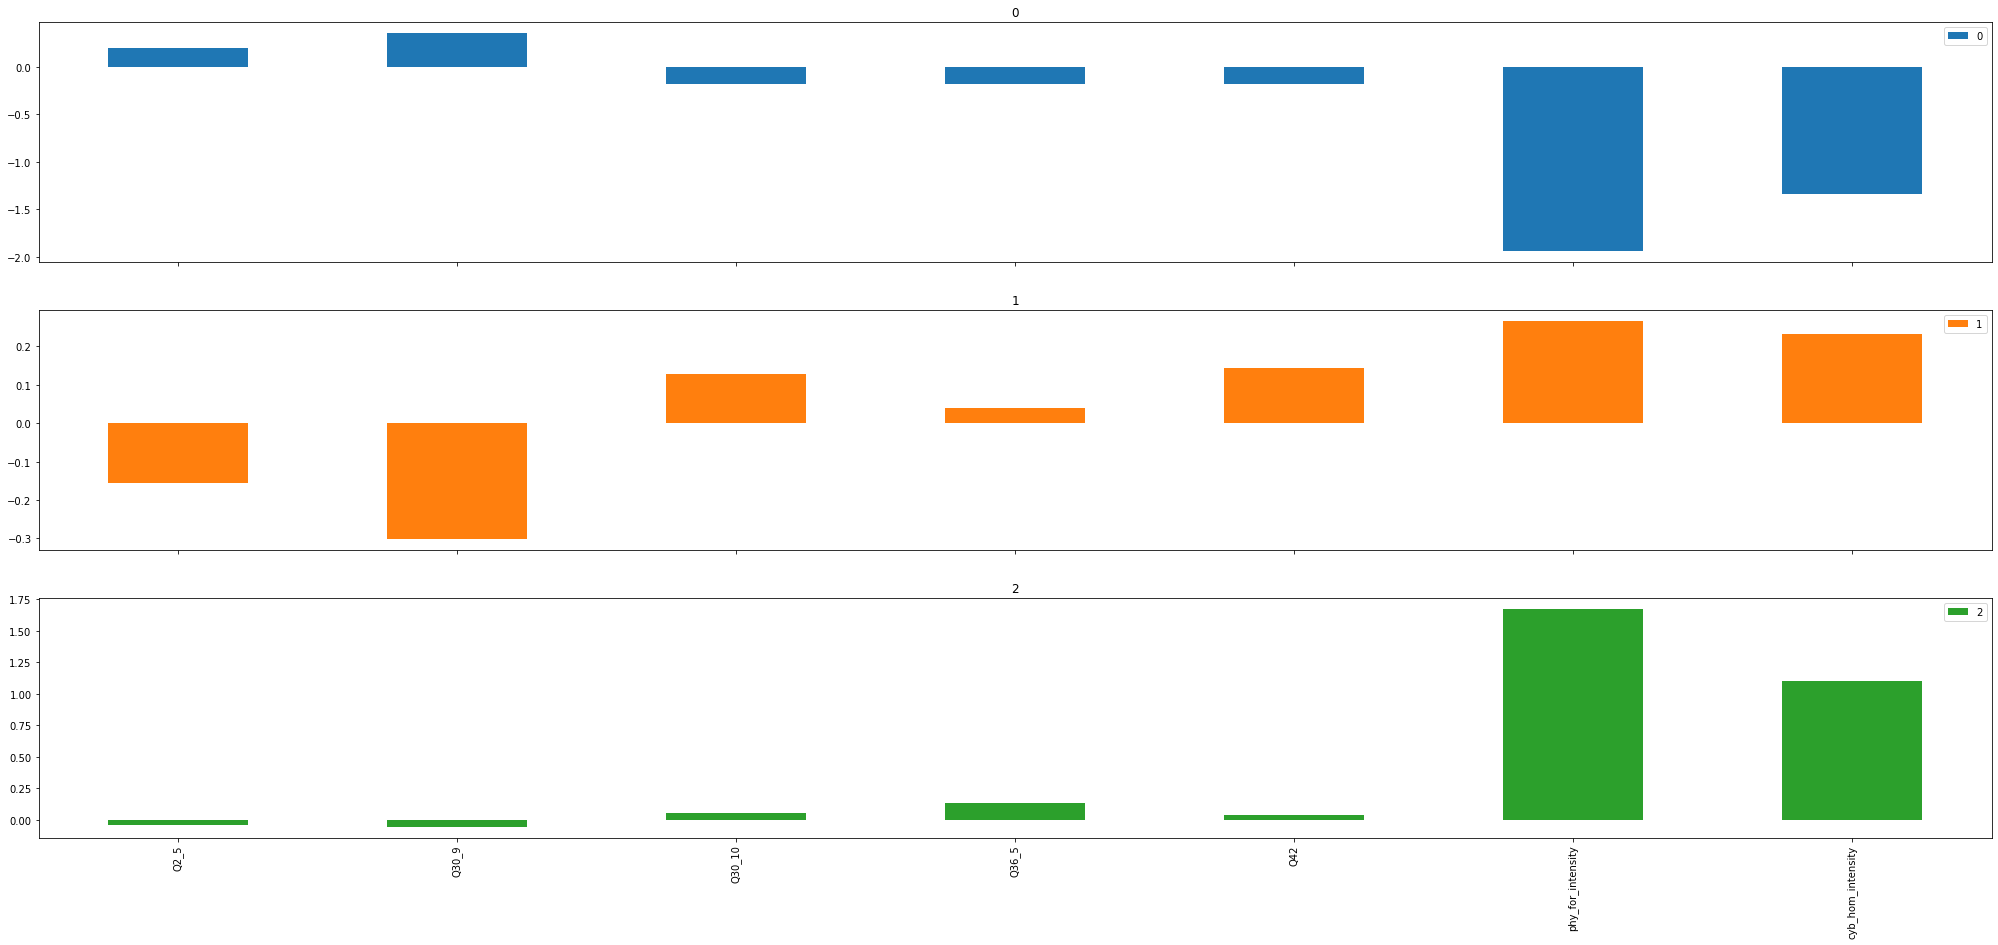

In [ ]:
### Bar graph of the coefficients for the model "multi4"

y3_coef=multi3.coef_

y3_var_coef = pd.DataFrame(y3_coef, columns = x.columns)

### Transpose coefficient dataframe for easy visualization

coef = y3_var_coef.T

coef.plot.bar(rot=90, subplots=True, figsize=(35,15))

### For easy table of the coefficients:

coef

In [ ]:
coef
coef.to_csv('/content/drive/My Drive/DA 6833/coef.csv')

In [ ]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 10000)
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, x, y_3_scale, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.718 (0.025)


**Multinomial Logistic Regression - y_4_scale = Physical Foreign Intensity**


# Plots / scratch work ignore


**Multinomial Logistic Regression: y_1 = Cyber Attack Home**


In [ ]:
pip install latex

>0.00 0.529 (0.011)
>0.01 0.525 (0.030)
>0.10 0.524 (0.027)
>1.00 0.521 (0.030)


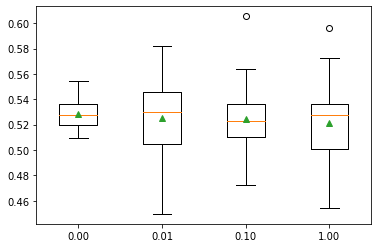

In [ ]:
## Multinomial Logistic Regression: y_1_scale = Cyber Attack Home

# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	#return X, y
  return x, y_1_scale
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.2f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()